In [1]:
import numpy as np
import os
import pickle

from keras.utils import np_utils
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, Input, concatenate
from keras.layers.convolutional import Conv2D, Convolution2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adadelta
from matplotlib import pyplot as plt 


Using TensorFlow backend.


In [3]:
captcha_word  = '0123'
width = 150
height = 45

word_len = 4
word_class = 1

train_dir = 'D:/data/YZM/four_train'
train_label = 'D:/data/YZM/four_label.txt'

#生成字符索引
char_indices = dict((c, i) for i,c in enumerate(captcha_word))
indices_char = dict((i, c) for i,c in enumerate(captcha_word))


def captcha_to_vec(captcha):    
   
    vector = np.zeros(word_len * word_class)
    for i,ch in enumerate(captcha):
        if ch == ',':
            continue
        idex = char_indices[ch]
        vector[idex] = 1
    return vector

#把数组转换回文字
def vec_to_captcha(vec):
    return np.argmax(vec)

test = captcha_to_vec('2')
vec = vec_to_captcha(test)

print(test)
print(vec)

[ 0.  0.  1.  0.]
2


In [4]:
#获取目录下样本列表
image_list = []

for item in os.listdir(train_dir):
    image_list.append(item)
print(len(image_list))


9700


In [5]:
X = np.zeros((len(image_list), height, width, 3), dtype = np.uint8)
y = np.zeros((len(image_list), word_len * word_class), dtype = np.uint8)

with open(train_label) as file_object:
    p = file_object.readlines()
for i,img in enumerate(image_list):
    img_path = train_dir + "/" + img
    raw_img = image.load_img(img_path, target_size=(height, width))
    X[i] = image.img_to_array(raw_img)
    for j in range(len(p)):
        if img[:4]==p[j][:4]:
            break;
    y[i] = captcha_to_vec(p[j][5])
print("ok")


ok


In [6]:
#保存成pkl文件
file = open('fourth_train_data.pkl','wb')
pickle.dump((X,y) , file)
print("ok")

ok


In [20]:
#读取pickle文件
file = open('fourth_train_data.pkl', 'rb')
X, y = pickle.load(file)
print("ok")

ok


In [17]:
#创建输入，结构为 高，宽，通道
input_tensor = Input( shape=(height, width, 3))

x = input_tensor

x = Convolution2D(32, 5, padding='same', activation='relu')(x)
x = Convolution2D(32, 5, padding='same', activation='relu')(x)
x = MaxPooling2D((2, 2))(x)


x = Convolution2D(64, 3, padding='same', activation='relu')(x)
x = Convolution2D(64, 3, padding='same', activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = Convolution2D(128, 3, padding='same', activation='relu')(x)
x = Convolution2D(128, 3, padding='same',activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)

x = Dropout(0.3)(x)

x = [Dense(word_class, activation='sigmoid', name='c%d'%(i+1))(x) for i in range(word_len)]
output = concatenate(x)

model = Model(inputs=input_tensor, outputs=output)


opt = Adadelta(lr=0.1)
model.compile(loss = 'binary_crossentropy', optimizer=opt, metrics=['accuracy'])


In [18]:
#每次epoch都保存一下权重，用于继续训练
checkpointer = ModelCheckpoint(filepath="D:/data/YZM/weight4/weights.{epoch:02d}--{val_loss:.2f}-{val_acc:.4f}.hdf5", 
                               verbose=2, save_weights_only=True)
print("ok")

ok


In [20]:
model.fit(X, y, epochs=30,callbacks=[checkpointer],validation_split=0.1)

Train on 8730 samples, validate on 970 samples
Epoch 1/30
8730/8730 [==============================] - 774s 89ms/step - loss: 0.8872 - acc: 0.7096 - val_loss: 0.3973 - val_acc: 0.8245
Epoch 2/30
8730/8730 [==============================] - 765s 88ms/step - loss: 0.3583 - acc: 0.8405 - val_loss: 0.2361 - val_acc: 0.9023
Epoch 3/30
8730/8730 [==============================] - 763s 87ms/step - loss: 0.2000 - acc: 0.9173 - val_loss: 0.1097 - val_acc: 0.9642
Epoch 4/30
8730/8730 [==============================] - 795s 91ms/step - loss: 0.0992 - acc: 0.9627 - val_loss: 0.0561 - val_acc: 0.9807
Epoch 5/30
8730/8730 [==============================] - 810s 93ms/step - loss: 0.0507 - acc: 0.9822 - val_loss: 0.0303 - val_acc: 0.9907
Epoch 6/30
8730/8730 [==============================] - 810s 93ms/step - loss: 0.0288 - acc: 0.9901 - val_loss: 0.0228 - val_acc: 0.9910
Epoch 7/30
8730/8730 [==============================] - 797s 91ms/step - loss: 0.0204 - acc: 0.9933 - val_loss: 0.0189 - val_acc: 0

8730/8730 [==============================] - 776s 89ms/step - loss: 2.4734e-04 - acc: 1.0000 - val_loss: 0.0090 - val_acc: 0.9979
Epoch 29/30
8730/8730 [==============================] - 777s 89ms/step - loss: 3.3944e-04 - acc: 0.9999 - val_loss: 0.0086 - val_acc: 0.9977
Epoch 30/30
8730/8730 [==============================] - 776s 89ms/step - loss: 3.5122e-04 - acc: 0.9999 - val_loss: 0.0080 - val_acc: 0.9977


In [23]:
#保存权重和模型
model.save_weights('D:/data/YZM/fourth_model_weights.h5')
model.save('D:/data/YZM/fourth_model.h5')

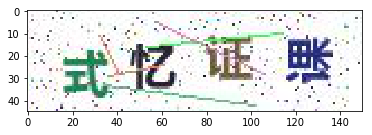

原始： 3 预测 3


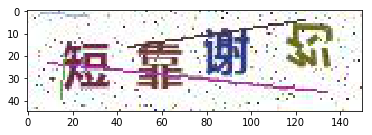

原始： 3 预测 3


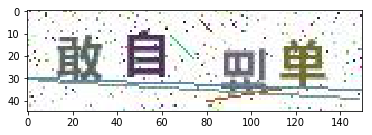

原始： 2 预测 2


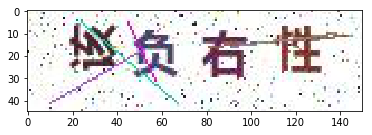

原始： 0 预测 0


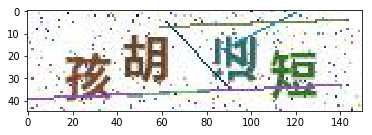

原始： 2 预测 2


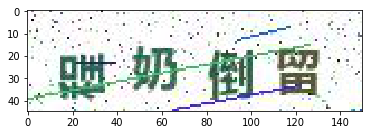

原始： 0 预测 0


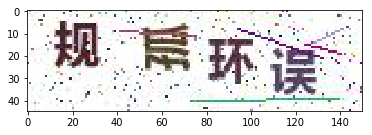

原始： 1 预测 1


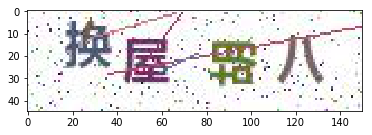

原始： 2 预测 2


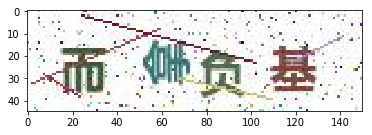

原始： 1 预测 1


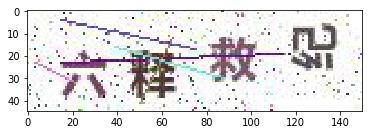

原始： 3 预测 3
1.0


In [21]:
def testCaptcha(index):
    raw_img = X[index]
    true_label = y[index]
    
    X_test = np.zeros((1, height, width, 3), dtype = np.float32)
    X_test[0] = image.img_to_array(raw_img)
    
    
    result = model.predict(X_test)
    vex_test = vec_to_captcha(result[0])
    true_test = vec_to_captcha(true_label)
    
    plt.imshow(raw_img)
    plt.show()
    
    print("原始：",true_test,"预测", vex_test)
    if vex_test ==true_test:
        return 1
    else:
        return 0
    
    
#选5张验证码进行验证
c=0
for i in range(10):
    if testCaptcha(i)==1:
               c+=1
print(c/10)